# Explore here

### Load the data

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [64]:
import pandas as pd

df = pd.read_csv('../data/us_disaster_declarations.csv')

In [45]:
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64092 entries, 1953-05-02 00:00:00+00:00 to 2023-03-26 00:00:00+00:00
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   fy_declared                 64092 non-null  int64 
 5   incident_type               64092 non-null  object
 6   declaration_title           64092 non-null  object
 7   ih_program_declared         64092 non-null  int64 
 8   ia_program_declared         64092 non-null  int64 
 9   pa_program_declared         64092 non-null  int64 
 10  hm_program_declared         64092 non-null  int64 
 11  incident_begin_date         64092 non-null  object
 12  incident_end_date           55682 non-null  object
 13 

In [18]:
df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000,64092.000000
mean,2577.105364,2004.339996,0.168087,0.268161,0.932035,0.431489,31705.675638,96373.283733,35025.917306
std,1405.535733,14.785293,0.373946,0.443006,0.251687,0.495288,16642.418797,13940.282164,34956.137681
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1316.000000,1997.000000,0.000000,0.000000,1.000000,0.000000,19183.000000,99029.000000,8151.000000
50%,3057.000000,2007.000000,0.000000,0.000000,1.000000,0.000000,30036.000000,99071.000000,20026.000000
75%,3546.000000,2018.000000,0.000000,1.000000,1.000000,1.000000,46075.000000,99123.000000,74028.000000
max,5457.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


In [19]:
df.columns.tolist()

['fema_declaration_string',
 'disaster_number',
 'state',
 'declaration_type',
 'fy_declared',
 'incident_type',
 'declaration_title',
 'ih_program_declared',
 'ia_program_declared',
 'pa_program_declared',
 'hm_program_declared',
 'incident_begin_date',
 'incident_end_date',
 'disaster_closeout_date',
 'fips',
 'place_code',
 'designated_area',
 'declaration_request_number',
 'last_ia_filing_date',
 'last_refresh',
 'hash',
 'id']

## EDA

### Explore 'state' feature

In [21]:
# Select features
features = ['incident_type', 'incident_begin_date', 'state']

df = df[features]

# Check number of values in each state
counts = df['state'].value_counts(ascending=False)

counts

state
TX    5173
MO    2704
KY    2583
VA    2524
LA    2493
OK    2474
FL    2352
GA    2278
NC    2096
PR    1987
MS    1906
IA    1848
KS    1759
AL    1665
TN    1605
CA    1599
AR    1593
MN    1563
NY    1503
NE    1485
IN    1451
SD    1430
ND    1359
IL    1283
OH    1281
PA    1239
WV    1232
ME    1019
WA     979
SC     947
WI     892
MI     796
CO     646
NJ     625
MT     605
OR     586
NM     514
MD     448
MA     398
ID     361
VT     338
AZ     335
AK     318
NH     301
NV     274
CT     255
UT     249
WY     128
RI     114
HI     100
VI      80
AS      76
MP      63
DE      53
MH      53
FM      31
DC      23
GU      19
PW       1
Name: count, dtype: int64

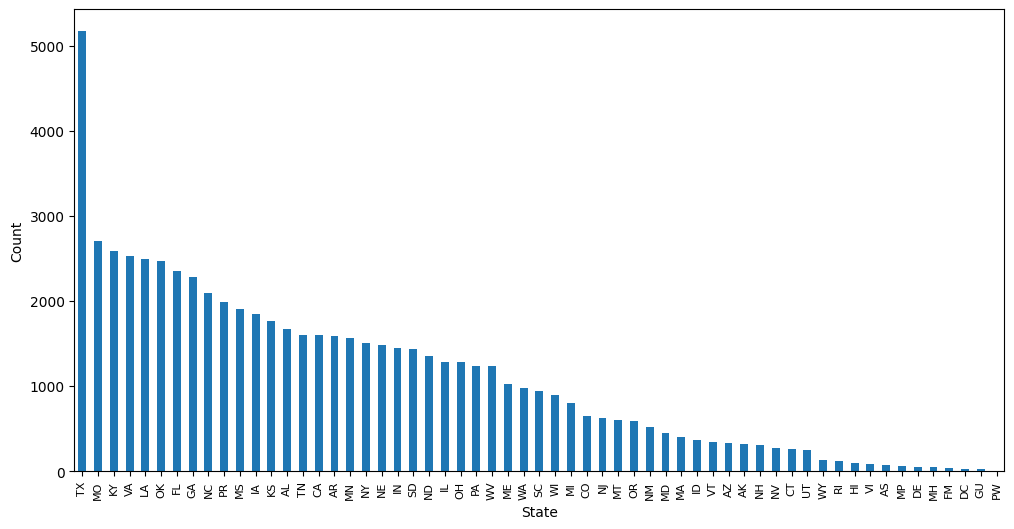

In [25]:
# Extract the counts for each state
counts = df['state'].value_counts(ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the bar plot
counts.plot(kind='bar')

# Set title and labels
plt.xlabel('State')
plt.ylabel('Count')

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=90, fontsize=8)

# Show plot
plt.show()

### Explore 'incident_type' feature

In [26]:
# Check number of values in each incident type
counts = df['incident_type'].value_counts(ascending=False)

counts

incident_type
Severe Storm         17490
Hurricane            13045
Flood                10693
Biological            7857
Snowstorm             3707
Fire                  3615
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          637
Other                  307
Freezing               301
Earthquake             228
Typhoon                130
Tropical Storm          54
Volcanic Eruption       51
Winter Storm            43
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Toxic Substances         9
Tsunami                  9
Chemical                 9
Human Cause              7
Terrorist                5
Name: count, dtype: int64

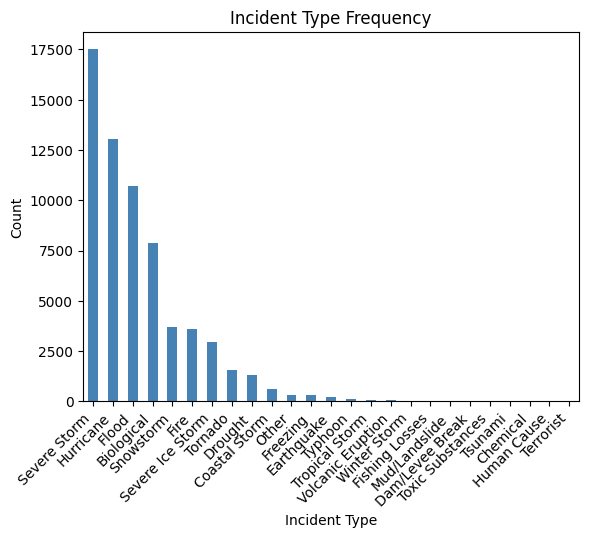

In [27]:
# Counts for each incident type
counts = df['incident_type'].value_counts()

counts.plot(kind='bar', color= 'steelblue')
plt.title('Incident Type Frequency')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()

### Explore frequency of disasters by state

In [34]:
disaster_types = df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

Types of Disasters reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane'
 'Volcanic Eruption' 'Severe Storm' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snowstorm' 'Severe Ice Storm' 'Freezing'
 'Coastal Storm' 'Fishing Losses' 'Mud/Landslide' 'Human Cause'
 'Terrorist' 'Tsunami' 'Chemical' 'Biological' 'Tropical Storm'
 'Winter Storm']
Occurrences:

 incident_type
Severe Storm         17490
Hurricane            13045
Flood                10693
Biological            7857
Snowstorm             3707
Fire                  3615
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          637
Other                  307
Freezing               301
Earthquake             228
Typhoon                130
Tropical Storm          54
Volcanic Eruption       51
Winter Storm            43
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Toxic Substances         9
Tsunami                  9
Chemic

In [42]:
data_df = df[['state','incident_type']].groupby('state').describe()
data_df['incident_type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
state,,,,
TX,5173,11,Hurricane,1303
MO,2704,8,Severe Storm,1339
KY,2583,10,Severe Storm,999
VA,2524,11,Hurricane,877
LA,2493,11,Hurricane,1364
OK,2474,9,Severe Storm,1005
FL,2352,11,Hurricane,1219
GA,2278,10,Hurricane,905
NC,2096,10,Hurricane,1304


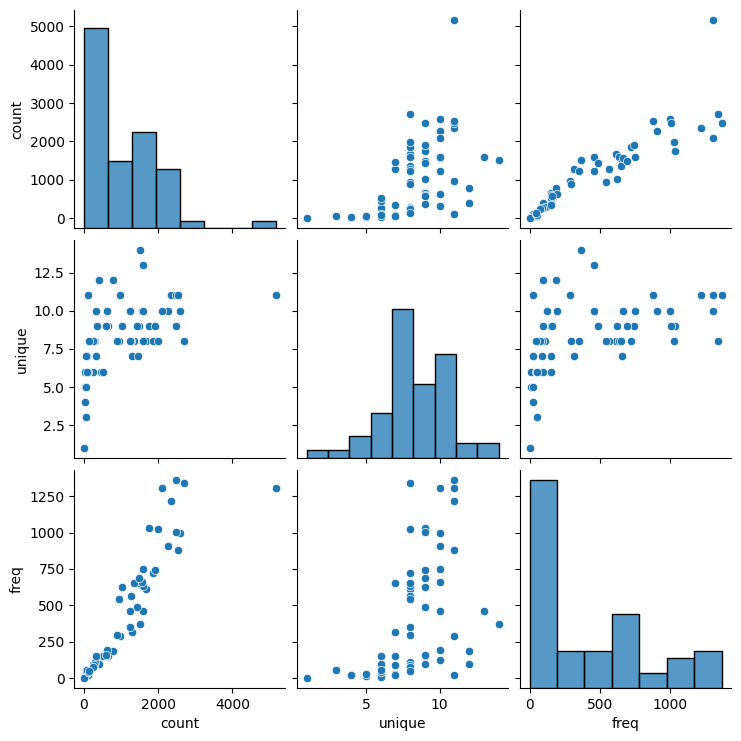

In [43]:
data_df = df[['state','incident_type']].groupby('state').describe()
sns.pairplot(data_df['incident_type'].reset_index(drop=True));

## Regularize time axis to monthly

In [66]:
# Add new colum 'declaration_dtm' where date obj is converted to dtm
df['declaration_dtm'] = pd.to_datetime(df['declaration_date'], format='%Y-%m-%dT%H:%M:%SZ')

df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,declaration_dtm
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,1953-05-02
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,1953-05-15
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,1953-05-29
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,1953-06-02
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,1953-06-06


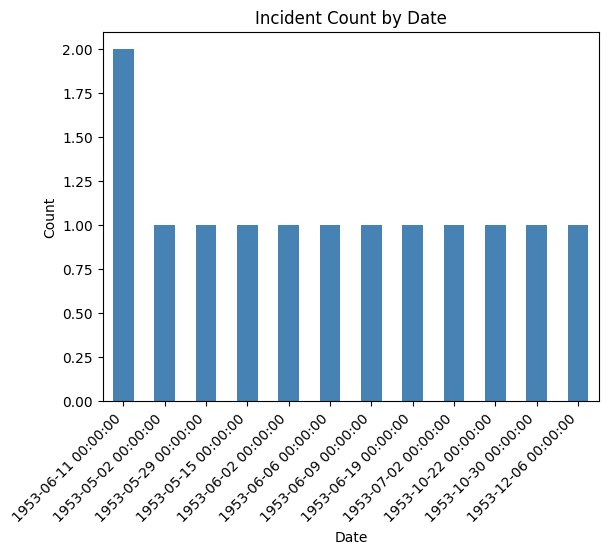

In [63]:
# Check time axis (for year 1953 only)
date_df = df[df['declaration_dtm'].dt.strftime('%Y')=='1953']
dates = date_df['declaration_dtm'].value_counts()

dates.plot(kind='bar', color= 'steelblue')
plt.title('Incident Count by Date')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

Looks like the time axis is by individual incident, rather than monthly.

In [67]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
# Create subset_df containing 'state', 'declaration_dtm', and 'incident_type'
subset_df = (df.assign(date=lambda d: pd.to_datetime(d['declaration_dtm'], format="%Y-%m-%d"))[['state', 'declaration_dtm', 'incident_type']])

# Set index to declaration_dtm, group by 'state', and sum the monthly (ME) incidents
subset_df.set_index('declaration_dtm').groupby('state').resample('ME').sum()

state incident_type
state declaration_dtm                      
AK    1953-10-31           AK         Other
      1953-11-30            0             0
      1953-12-31            0             0
      1954-01-31            0             0
      1954-02-28            0             0
...                       ...           ...
WY    2020-05-31            0             0
      2020-06-30            0             0
      2020-07-31            0             0
      2020-08-31            0             0
      2020-09-30       WYWYWY  FireFireFire

[43729 rows x 2 columns]